# Lab 3 - Neural Networks


#### Dependencies:

In [88]:
import tensorflow as tf
from visualize_activations import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

#### 
## 1.1 Data

In [89]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape, "x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,) x_test shape: (10000, 28, 28) y_test shape: (10000,)


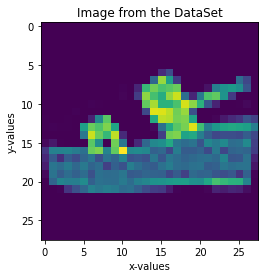

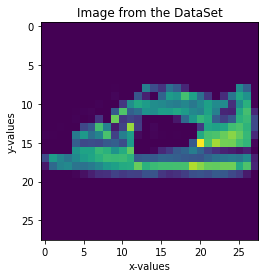

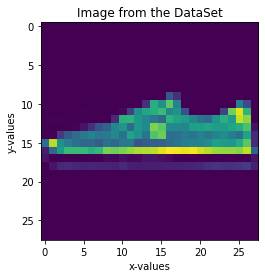

In [93]:
for i in range(12, 15):
    plt.imshow(x_train[i])
    plt.title('Image from the DataSet')
    plt.xlabel('x-values')
    plt.ylabel('y-values')
    plt.show()

In [94]:
x_train=x_train/255
x_test=x_test/255

In [54]:
y_train=tf.keras.utils.to_categorical(y_train, num_classes=10, dtype="float32")
y_test=tf.keras.utils.to_categorical(y_test, num_classes=10, dtype="float32")

In [95]:
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [56]:
x_train=np.expand_dims(x_train,axis=3);
x_test=np.expand_dims(x_test,axis=3);
x_validation=np.expand_dims(x_validation,axis=3)
print("x_train shape:", x_train.shape, "x_test shape:", x_test.shape,"x_validation shape:", x_validation.shape)

x_train shape: (48000, 28, 28, 1) x_test shape: (10000, 28, 28, 1) x_validation shape: (12000, 28, 28, 1)


#### 
## 1.2 MLP

In [57]:
model = tf.keras.Sequential(name="MLP_Early")
model.add(tf.keras.layers.Flatten(input_shape=(28, 28, 1)))
print("model shape:", model.output_shape)

model shape: (None, 784)


In [58]:
model.add(tf.keras.layers.Dense(32, activation="relu", name="Dense_32"))
print("model shape:", model.output_shape)
model.add(tf.keras.layers.Dense(64, activation="relu", name="Dense_64"))
print("model shape:", model.output_shape)

model shape: (None, 32)
model shape: (None, 64)


In [59]:
model.add(tf.keras.layers.Dense(10,activation="softmax",name="Softmax_10"))
print("model shape:", model.output_shape)

model shape: (None, 10)


In [60]:
model.summary()

Model: "MLP_Early"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
Dense_32 (Dense)             (None, 32)                25120     
_________________________________________________________________
Dense_64 (Dense)             (None, 64)                2112      
_________________________________________________________________
Softmax_10 (Dense)           (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


In [61]:
callback=tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

In [62]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001,clipnorm=1)
model.compile(optimizer=opt, loss="categorical_crossentropy")
history=model.fit(x=x_train,y=y_train,epochs=200,batch_size=200,callbacks=[callback],validation_data=(x_validation,y_validation))

Epoch 1/200
240/240 [==============================] - 0s 1ms/step - loss: 0.7157 - val_loss: 0.4868
Epoch 2/200
240/240 [==============================] - 0s 1ms/step - loss: 0.4521 - val_loss: 0.4417
Epoch 3/200
240/240 [==============================] - 0s 1ms/step - loss: 0.4091 - val_loss: 0.4279
Epoch 4/200
240/240 [==============================] - 0s 1ms/step - loss: 0.3871 - val_loss: 0.3870
Epoch 5/200
240/240 [==============================] - 0s 1ms/step - loss: 0.3676 - val_loss: 0.3818
Epoch 6/200
240/240 [==============================] - 0s 1ms/step - loss: 0.3534 - val_loss: 0.4208
Epoch 7/200
240/240 [==============================] - 0s 1ms/step - loss: 0.3482 - val_loss: 0.3621
Epoch 8/200
240/240 [==============================] - 0s 1ms/step - loss: 0.3322 - val_loss: 0.3670
Epoch 9/200
240/240 [==============================] - 0s 999us/step - loss: 0.3266 - val_loss: 0.3595
Epoch 10/200
240/240 [==============================] - 0s 1ms/step - loss: 0.3175 - val_

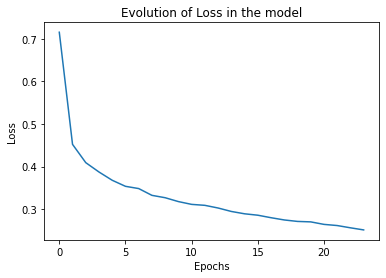

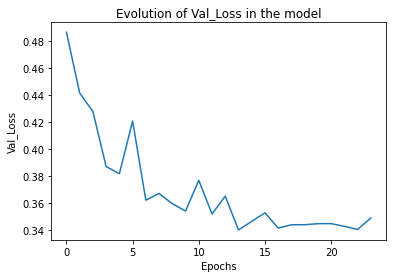

In [63]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.title('Evolution of Loss in the model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
plt.figure(2)
plt.plot(history.history['val_loss'])
plt.title('Evolution of Val_Loss in the model')
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')
plt.show()

In [64]:
y_prediction=model.predict(x=x_test,batch_size=200,callbacks=[callback])
y_prediction=np.argmax(y_prediction, axis=1)
y_prediction=tf.keras.utils.to_categorical(y_prediction, num_classes=10, dtype="float32")
print("Accuracy score:", accuracy_score(y_test, y_prediction),"\n","Confusion Matrix:",confusion_matrix(y_test.argmax(axis=1), y_prediction.argmax(axis=1)))

Accuracy score: 0.8718 
 Confusion Matrix: [[819   3  14  35   5   0 114   0  10   0]
 [  2 960   1  27   7   0   2   0   1   0]
 [ 11   1 802  15 106   0  63   0   2   0]
 [ 23  11  13 877  46   0  26   0   4   0]
 [  0   0  98  27 816   1  53   0   5   0]
 [  2   1   0   0   0 958   0  21   2  16]
 [112   1 119  36  82   1 637   0  11   1]
 [  0   0   0   0   0  35   0 936   1  28]
 [  6   1   4   3   8   4   7   3 964   0]
 [  0   0   0   0   0  15   1  35   0 949]]


#### 
### Doing the same thing without early stopping

In [65]:
model2 = tf.keras.Sequential(name="MLP_NoEarly")
model2.add(tf.keras.layers.Flatten(input_shape=(28, 28, 1)))
print("model2 shape:", model2.output_shape)

model2 shape: (None, 784)


In [66]:
model2.add(tf.keras.layers.Dense(32, activation="relu", name="Dense_32"))
print("model2 shape:", model2.output_shape)
model2.add(tf.keras.layers.Dense(64, activation="relu", name="Dense_64"))
print("model2 shape:", model2.output_shape)

model2 shape: (None, 32)
model2 shape: (None, 64)


In [67]:
model2.add(tf.keras.layers.Dense(10,activation="softmax",name="Softmax_10"))
print("model2 shape:", model2.output_shape)

model2 shape: (None, 10)


In [68]:
model2.summary()

Model: "MLP_NoEarly"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
Dense_32 (Dense)             (None, 32)                25120     
_________________________________________________________________
Dense_64 (Dense)             (None, 64)                2112      
_________________________________________________________________
Softmax_10 (Dense)           (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


In [69]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001,clipnorm=1)
model2.compile(optimizer=opt, loss="categorical_crossentropy")
history=model2.fit(x=x_train,y=y_train,epochs=200,batch_size=200,validation_data=(x_validation,y_validation))

Epoch 1/200
240/240 [==============================] - 0s 1ms/step - loss: 0.7263 - val_loss: 0.5116
Epoch 2/200
240/240 [==============================] - 0s 1ms/step - loss: 0.4578 - val_loss: 0.4389
Epoch 3/200
240/240 [==============================] - 0s 1ms/step - loss: 0.4148 - val_loss: 0.4078
Epoch 4/200
240/240 [==============================] - 0s 1ms/step - loss: 0.3849 - val_loss: 0.3968
Epoch 5/200
240/240 [==============================] - 0s 991us/step - loss: 0.3672 - val_loss: 0.3865
Epoch 6/200
240/240 [==============================] - 0s 1ms/step - loss: 0.3568 - val_loss: 0.3711
Epoch 7/200
240/240 [==============================] - 0s 1ms/step - loss: 0.3436 - val_loss: 0.3628
Epoch 8/200
240/240 [==============================] - 0s 1ms/step - loss: 0.3337 - val_loss: 0.3662
Epoch 9/200
240/240 [==============================] - 0s 1ms/step - loss: 0.3242 - val_loss: 0.3586
Epoch 10/200
240/240 [==============================] - 0s 1ms/step - loss: 0.3153 - val_

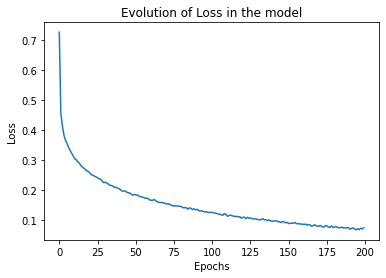

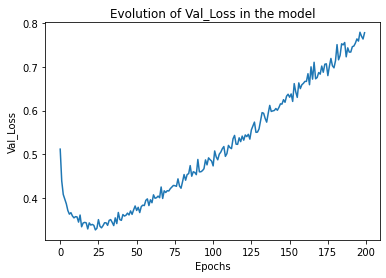

In [70]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.title('Evolution of Loss in the model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
plt.figure(2)
plt.plot(history.history['val_loss'])
plt.title('Evolution of Val_Loss in the model')
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')
plt.show()

In [71]:
y_prediction=model2.predict(x=x_test,batch_size=200)
y_prediction=np.argmax(y_prediction, axis=1)
y_prediction=tf.keras.utils.to_categorical(y_prediction, num_classes=10, dtype="float32")
print("Accuracy score:", accuracy_score(y_test, y_prediction),"\n","Confusion Matrix:",confusion_matrix(y_test.argmax(axis=1), y_prediction.argmax(axis=1)))

Accuracy score: 0.857 
 Confusion Matrix: [[790   4  19  19   8   1 151   0   8   0]
 [  1 972   4  14   3   0   6   0   0   0]
 [ 17   2 730  10 153   1  84   0   2   1]
 [ 33  19  26 817  67   0  32   0   5   1]
 [  3   2  72  20 838   1  63   0   1   0]
 [  3   2   1   0   0 930   2  28   7  27]
 [124   4  65  26 101   0 674   0   6   0]
 [  1   0   0   3   0  22   0 946   0  28]
 [ 10   1  12   7  12   4  18   4 931   1]
 [  1   0   0   0   0   6   2  49   0 942]]


#### 
## 1.3 CNN

In [72]:
model3 = tf.keras.Sequential(name="CNN")
model3.add(tf.keras.layers.Conv2D(16,3,input_shape=(28, 28, 1),activation="relu"))
print("model2 shape:", model3.output_shape)

model2 shape: (None, 26, 26, 16)


In [73]:
model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
print("model2 shape:", model3.output_shape)

model2 shape: (None, 13, 13, 16)


In [74]:
model3.add(tf.keras.layers.Conv2D(16,3,input_shape=(28, 28, 1),activation="relu"))
print("model2 shape:", model3.output_shape)

model2 shape: (None, 11, 11, 16)


In [75]:
model3.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
print("model2 shape:", model3.output_shape)

model2 shape: (None, 5, 5, 16)


In [76]:
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(32, activation="relu", name="Dense_32"))
print("model3 shape:", model3.output_shape)

model3 shape: (None, 32)


In [77]:
model3.add(tf.keras.layers.Dense(10,activation="softmax",name="Softmax_10_2"))
print("model3 shape:", model3.output_shape)

model3 shape: (None, 10)


In [78]:
model3.summary()

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 400)               0         
_________________________________________________________________
Dense_32 (Dense)             (None, 32)                12832     
_________________________________________________________________
Softmax_10_2 (Dense)         (None, 10)                330     

In [79]:
model3.compile(optimizer=opt, loss="categorical_crossentropy")
history=model3.fit(x=x_train,y=y_train,epochs=200,batch_size=200,callbacks=[callback],validation_data=(x_validation,y_validation))

Epoch 1/200
240/240 [==============================] - 5s 20ms/step - loss: 0.6348 - val_loss: 0.4525
Epoch 2/200
240/240 [==============================] - 5s 20ms/step - loss: 0.4293 - val_loss: 0.4196
Epoch 3/200
240/240 [==============================] - 5s 21ms/step - loss: 0.3910 - val_loss: 0.3777
Epoch 4/200
240/240 [==============================] - 5s 21ms/step - loss: 0.3660 - val_loss: 0.3746
Epoch 5/200
240/240 [==============================] - 5s 21ms/step - loss: 0.3460 - val_loss: 0.3578
Epoch 6/200
240/240 [==============================] - 5s 21ms/step - loss: 0.3303 - val_loss: 0.3372
Epoch 7/200
240/240 [==============================] - 5s 21ms/step - loss: 0.3219 - val_loss: 0.3336
Epoch 8/200
240/240 [==============================] - 5s 22ms/step - loss: 0.3099 - val_loss: 0.3205
Epoch 9/200
240/240 [==============================] - 5s 19ms/step - loss: 0.2998 - val_loss: 0.3170
Epoch 10/200
240/240 [==============================] - 5s 19ms/step - loss: 0.292

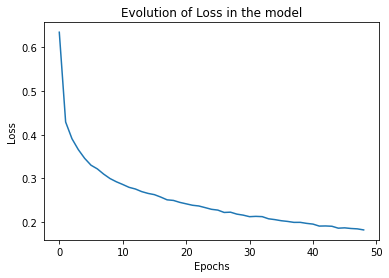

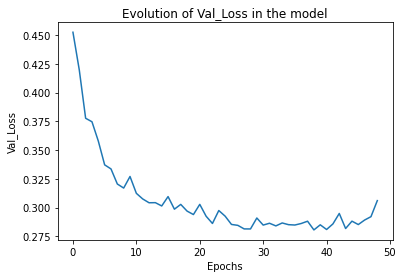

In [80]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.title('Evolution of Loss in the model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
plt.figure(2)
plt.plot(history.history['val_loss'])
plt.title('Evolution of Val_Loss in the model')
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')
plt.show()

In [81]:
y_prediction=model3.predict(x=x_test,batch_size=200)
y_prediction=np.argmax(y_prediction, axis=1)
y_prediction=tf.keras.utils.to_categorical(y_prediction, num_classes=10, dtype="float32")
print("Accuracy score:", accuracy_score(y_test, y_prediction),"\n","Confusion Matrix:",confusion_matrix(y_test.argmax(axis=1), y_prediction.argmax(axis=1)))

Accuracy score: 0.8946 
 Confusion Matrix: [[861   1  31  15   7   2  74   0   9   0]
 [  0 980   1  10   2   0   5   0   2   0]
 [ 14   1 852   6  60   0  64   0   3   0]
 [ 24  14  17 857  49   0  34   0   5   0]
 [  1   1  62  20 843   0  68   0   5   0]
 [  0   0   0   1   0 966   0  25   1   7]
 [139   3  61  22  73   0 690   0  12   0]
 [  0   0   0   0   0   8   0 955   0  37]
 [  1   0   7   1   1   2   4   3 979   2]
 [  0   0   0   0   0   6   0  30   1 963]]


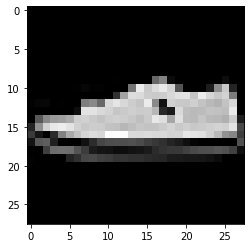

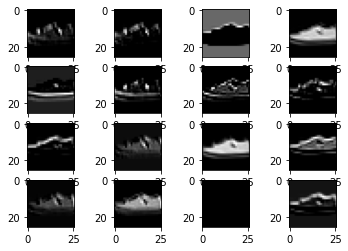

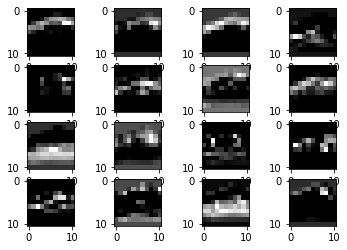

In [97]:
image = x_train[13].copy()
image = image.squeeze()
visualize_activations(model3,[0,2],image)